# Análisis de datos

### Importamos lo que vamos a necesitar

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Cargamos los datos en un DataFrame

In [40]:
df_pocket = pd.read_csv('data/tournament_data.csv')

### Vemos algo de información sobre los datos

In [41]:
print('Shape:')
print(df_pocket.shape)

print('\nValores únicos por columna:')
print(df_pocket.nunique())

print(f'\nInfo:')
print(df_pocket.info())


Shape:
(348, 5)

Valores únicos por columna:
Deck          95
Placement     16
Tournament    24
Players       22
Tier           2
dtype: int64

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Deck        348 non-null    object 
 1   Placement   348 non-null    float64
 2   Tournament  348 non-null    object 
 3   Players     348 non-null    int64  
 4   Tier        348 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 13.7+ KB
None


## Los 5 decks más jugados

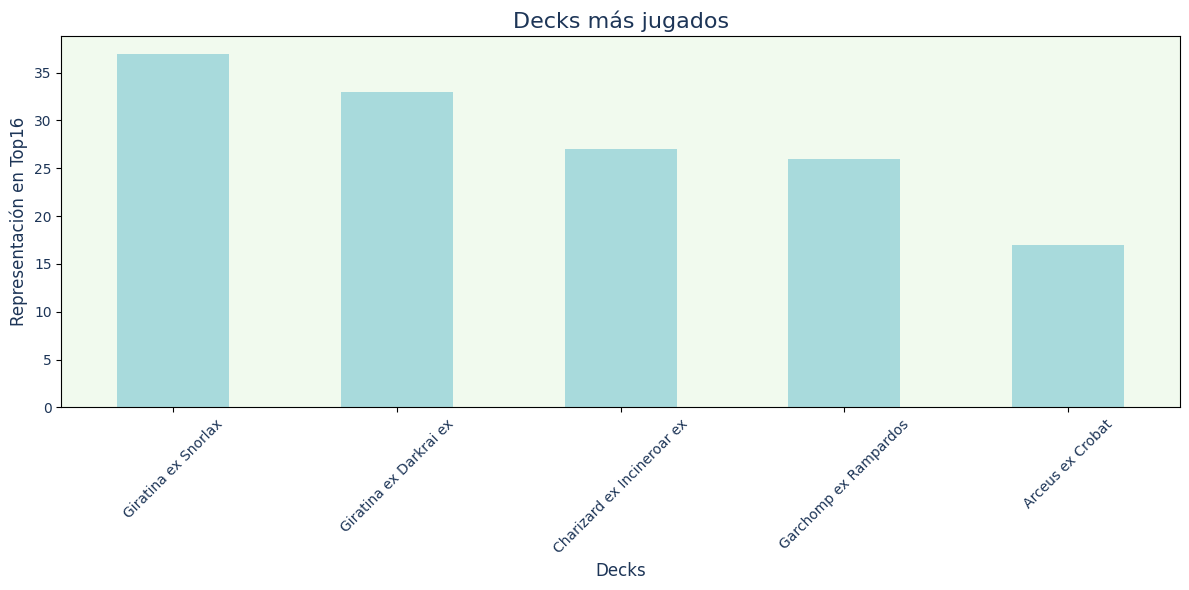

In [42]:
decks = df_pocket['Deck'].value_counts()

# Cogemos los 5 mazos más jugados
top5 = decks.head(5)

# Indicamos con qué montar el gráfico
plt.figure(figsize=(12, 6))
top5.plot(kind='bar', color='#A8DADC')

# Configuración del gráfico
plt.title('Decks más jugados', fontsize=16, color='#1D3557')
plt.xlabel('Decks', fontsize=12, color='#1D3557')
plt.ylabel('Representación en Top16', fontsize=12, color='#1D3557')
plt.xticks(rotation=45, fontsize=10, color='#1D3557')
plt.yticks(fontsize=10, color='#1D3557')
plt.gca().set_facecolor('#F1FAEE')

# Guardamos el gráfico
plt.savefig('img/decks_mas_jugados.png', 
            dpi=300,
            bbox_inches='tight'
           )

# Enseñamos el gráfico
plt.tight_layout()
plt.show()


## Los 5 decks con mejor posicionamiento promedio

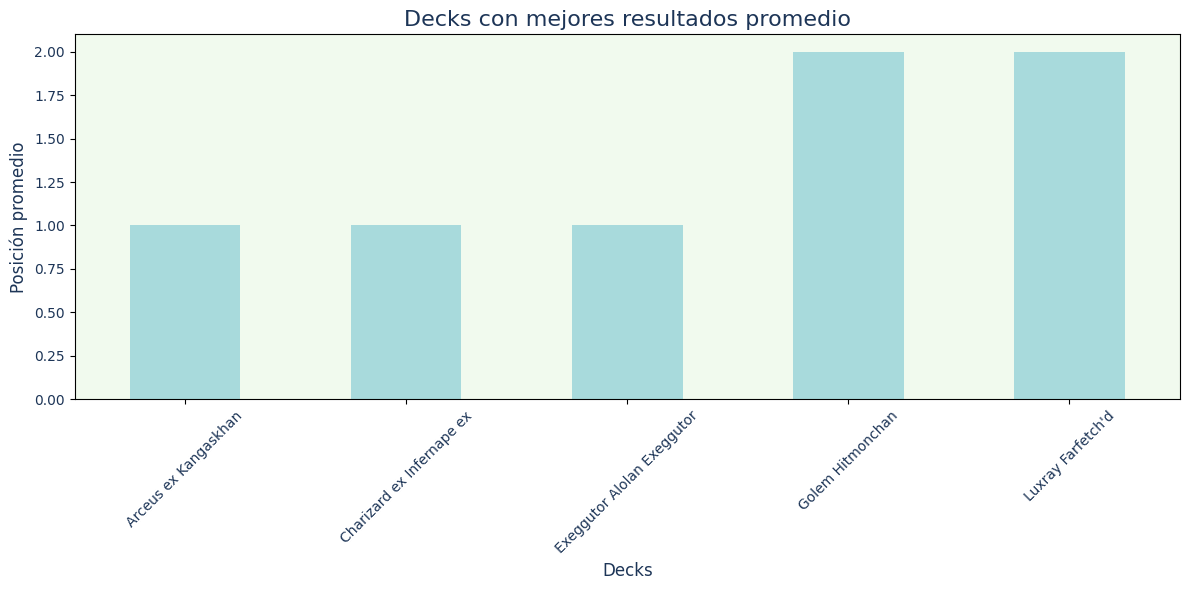

In [43]:
# Se calcula la media de la posición de cada mazo
average_placement = df_pocket.groupby('Deck')['Placement'].mean().sort_values()

# Cogemos los 5 primeros mazos
top5 = average_placement.head(5)

# Indicamos con qué montar el gráfico
plt.figure(figsize=(12, 6))
top5.plot(kind='bar', color='#A8DADC')

# Configuración del gráfico
plt.title('Decks con mejores resultados promedio', fontsize=16, color='#1D3557')
plt.xlabel('Decks', fontsize=12, color='#1D3557')
plt.ylabel('Posición promedio', fontsize=12, color='#1D3557')
plt.xticks(rotation=45, fontsize=10, color='#1D3557')
plt.yticks(fontsize=10, color='#1D3557')
plt.gca().set_facecolor('#F1FAEE')

# Guardamos el gráfico
plt.savefig('img/mejor_placement_promedio.png', 
            dpi=300,
            bbox_inches='tight'
           )

# Enseñamos el gráfico
plt.tight_layout()
plt.show()


## Distribución de mazos segun Tier

C:\Users\hugof\AppData\Local\Temp\ipykernel_16408\3723964936.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tier', y='Placement', data=top5_conJugadores, palette='Blues')


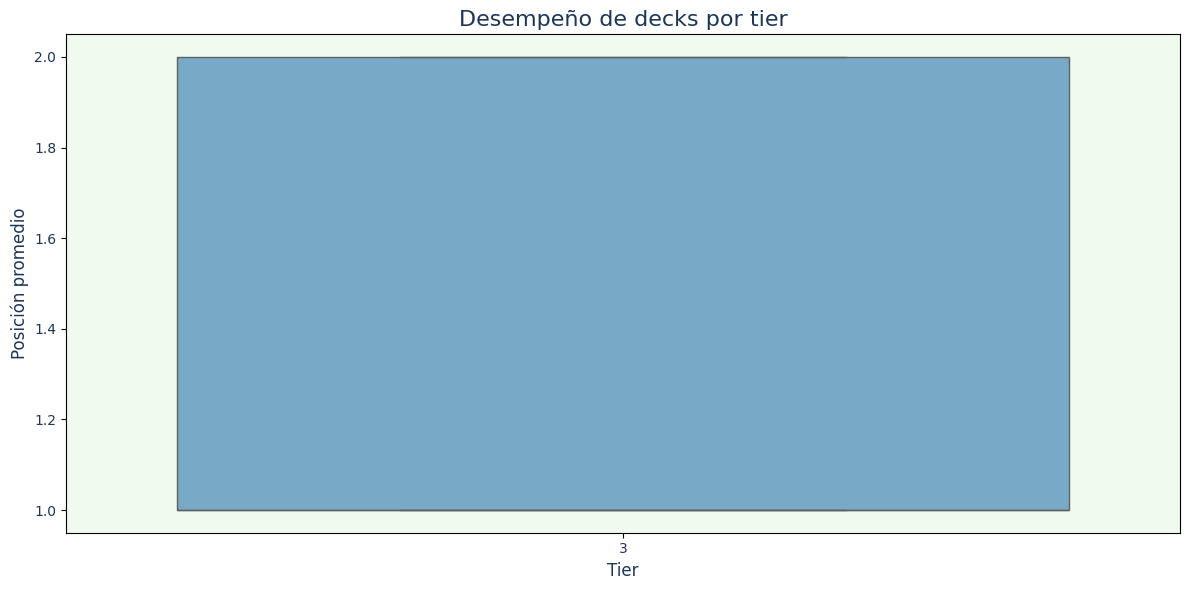

In [45]:
# Calculamos la posición promedio de cada mazo por tier
tier_performance = df_pocket.groupby(['Tier', 'Deck']).agg({'Placement': 'mean'}).reset_index()

# Asignamos los mazos mas jugados a una variable
top5_conJugadores = tier_performance[tier_performance['Deck'].isin(top5.index)]

# Indicamos con qué montar el gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tier', y='Placement', data=top5_conJugadores, palette='Blues')

# Configuración del gráfico
plt.title('Desempeño de decks por tier', fontsize=16, color='#1D3557')
plt.xlabel('Tier', fontsize=12, color='#1D3557')
plt.ylabel('Posición promedio', fontsize=12, color='#1D3557')
plt.xticks(fontsize=10, color='#1D3557')
plt.yticks(fontsize=10, color='#1D3557')
plt.gca().set_facecolor('#F1FAEE')

# Guardamos el gráfico
plt.savefig('img/dist_by_tier.png', 
            dpi=300,
            bbox_inches='tight'
           )

# Enseñamos el gráfico
plt.tight_layout()
plt.show()

## Cantidad de torneos ganados por los 5 decks más jugados

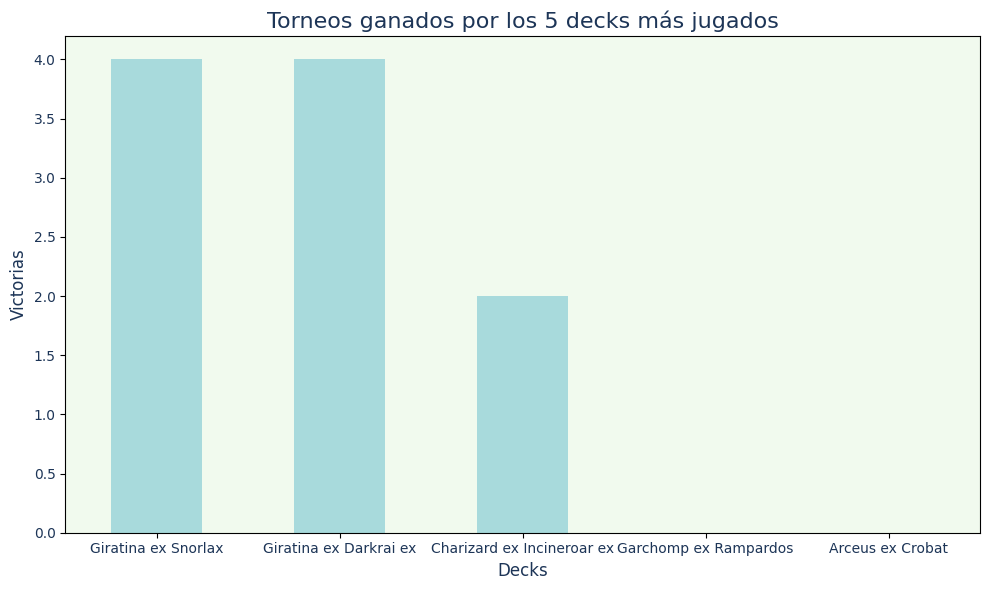

In [46]:
# Cogemos los 5 decks más jugados otra vez
top5 = df_pocket['Deck'].value_counts().head(5).index

# Buscamos los datos de los torneos de los decks más jugados
top_5_df = df_pocket[df_pocket['Deck'].isin(top5)]

# Contamos cuantas veces quedó en primera posición cada mazo
wins = top_5_df[top_5_df['Placement'] == 1].groupby('Deck').size()

# Si alguno de los mazos no ganó torneos reflejamos un 0
wins = wins.reindex(top5, fill_value=0)

# Indicamos con qué montar el gráfico
plt.figure(figsize=(10, 6))
wins.plot(kind='bar', color='#A8DADC')

# Configuración del gráfico
plt.title('Torneos ganados por los 5 decks más jugados', fontsize=16, color='#1D3557')
plt.xlabel('Decks', fontsize=12, color='#1D3557')
plt.ylabel('Victorias', fontsize=12, color='#1D3557')
plt.xticks(rotation=0, fontsize=10, color='#1D3557')
plt.yticks(fontsize=10, color='#1D3557')
plt.gca().set_facecolor('#F1FAEE')

# Guardamos el gráfico
plt.savefig('img/torneos_ganados_5_mejores.png', 
            dpi=300,
            bbox_inches='tight'
           )

# Enseñamos el gráfico
plt.tight_layout()
plt.show()


## Decks que ganaron mayor cantidad de torneos

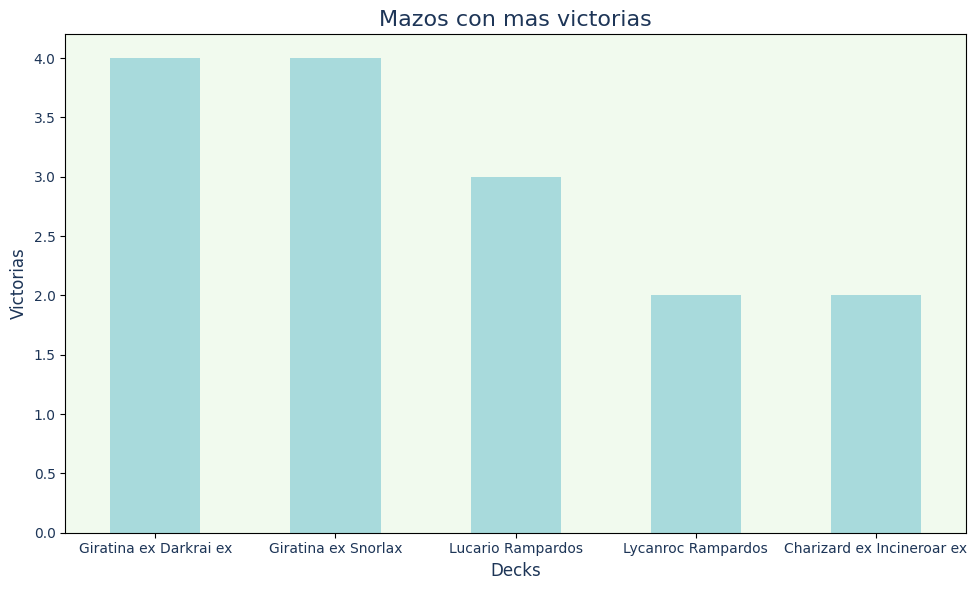

In [47]:
# Cogemos los mazos solo con torneos ganados
winners_df = df_pocket[df_pocket['Placement'] == 1]

# Contamos las victorias de cada mazo
wins_by_deck = winners_df['Deck'].value_counts()

# Seleccionamos de todos, los 5 mejores
top5_winner = wins_by_deck.head(5)

# Indicamos con qué montar el gráfico
plt.figure(figsize=(10, 6))
top5_winner.plot(kind='bar', color='#A8DADC')

# Configuración del gráfico
plt.title('Mazos con mas victorias', fontsize=16, color='#1D3557')
plt.xlabel('Decks', fontsize=12, color='#1D3557')
plt.ylabel('Victorias', fontsize=12, color='#1D3557')
plt.xticks(rotation=0, fontsize=10, color='#1D3557')
plt.yticks(fontsize=10, color='#1D3557')
plt.gca().set_facecolor('#F1FAEE')

# Guardamos el gráfico
plt.savefig('img/decks_con_mas_wins.png', 
            dpi=300,
            bbox_inches='tight'
           )

# Enseñamos el gráfico
plt.tight_layout()
plt.show()


## Mejor posición de los 5 decks menos frecuentes

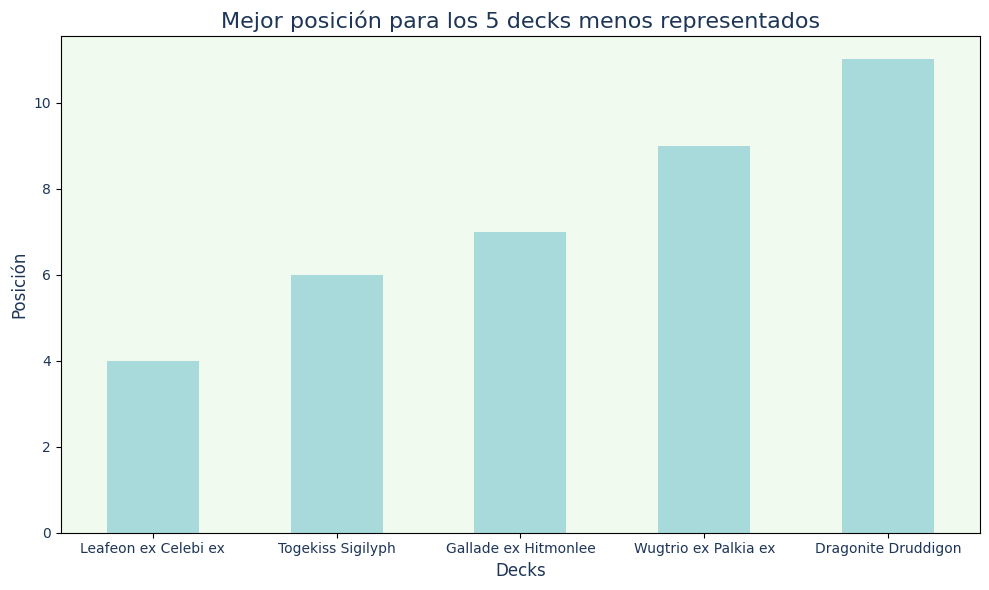

In [48]:
# Contamos cuantas veces aparece cada deck
deck_counts = df_pocket['Deck'].value_counts()

# Cogemos los 5 que menos aparecen
bottom5_decks = deck_counts.tail(5).index

# Cogemos los datos de los 5 decks
bottom5_df = df_pocket[df_pocket['Deck'].isin(bottom5_decks)]

# Calculamos la mejor posición de cada deck
bottom5_best = bottom5_df.groupby('Deck')['Placement'].min()

# Ordenamos los resultados
bottom5_best = bottom5_best.sort_values()

# Indicamos con qué montar el gráfico
plt.figure(figsize=(10, 6))
bottom5_best.plot(kind='bar', color='#A8DADC')

# Configuración del gráfico
plt.title('Mejor posición para los 5 decks menos representados', fontsize=16, color='#1D3557')
plt.xlabel('Decks', fontsize=12, color='#1D3557')
plt.ylabel('Posición', fontsize=12, color='#1D3557')
plt.xticks(rotation=0, fontsize=10, color='#1D3557')
plt.yticks(fontsize=10, color='#1D3557')
plt.gca().set_facecolor('#F1FAEE')

# Guardamos el gráfico
plt.savefig('img/best_placement_5_peores.png', 
            dpi=300,
            bbox_inches='tight'
           )

# Enseñamos el gráfico
plt.tight_layout()
plt.show()



## Cantidad de mazos con 3 o más victorias

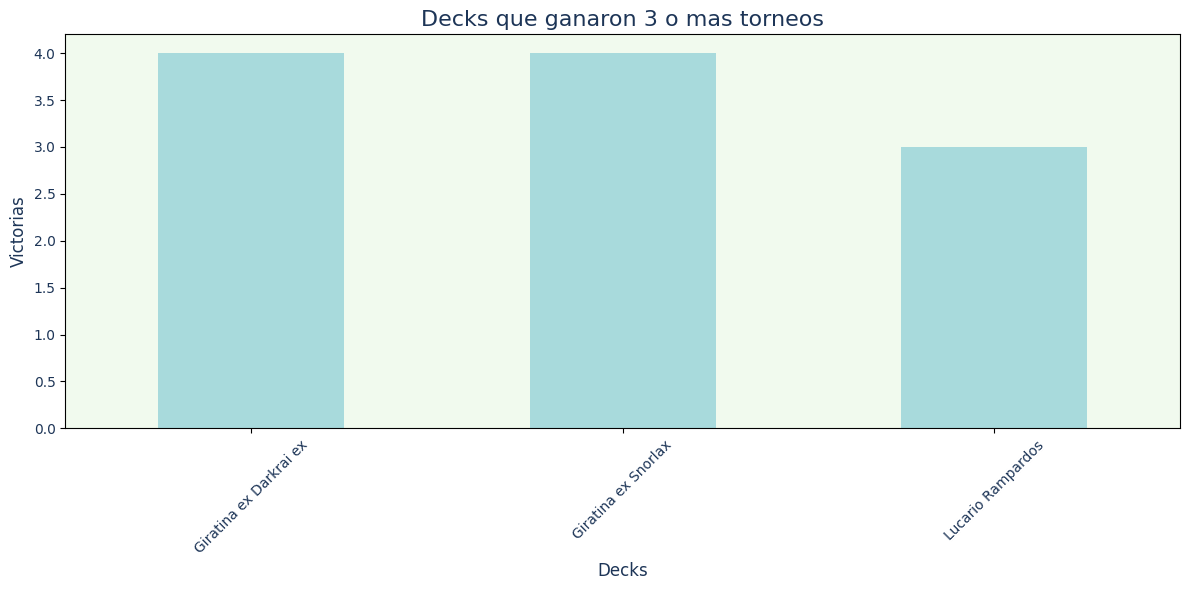

In [49]:
# Contamos cuantas veces quedó en primera posición cada mazo
deck_wins = df_pocket[df_pocket['Placement'] == 1]['Deck'].value_counts()

# Cogemos los que ganaron 3 o mas
decks_3 = deck_wins[wins_by_deck >= 3]

# Indicamos con qué montar el gráfico
plt.figure(figsize=(12, 6))
decks_3.plot(kind='bar', color='#A8DADC')  # Azul oscuro para las barras

# Configuración del gráfico
plt.title('Decks que ganaron 3 o mas torneos', fontsize=16, color='#1D3557')  # Azul claro
plt.xlabel('Decks', fontsize=12, color='#1D3557')
plt.ylabel('Victorias', fontsize=12, color='#1D3557')
plt.xticks(rotation=45, fontsize=10, color='#1D3557')
plt.yticks(fontsize=10, color='#1D3557')
plt.gca().set_facecolor('#F1FAEE')

# Guardamos el gráfico
plt.savefig('img/mas_victorias.png', 
            dpi=300,
            bbox_inches='tight'
           )

# Enseñamos el gráfico
plt.tight_layout()
plt.show()



